In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/jj.csv")

In [3]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
train = df[:-4]
test = df[-4:]

In [5]:
import numpy as np

In [6]:
historical_mean = np.mean(train['data'])
print(historical_mean)

4.308499987499999


In [9]:
test.loc[:,'pred_mean'] = historical_mean


In [10]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


In [13]:
import matplotlib.pyplot as plt

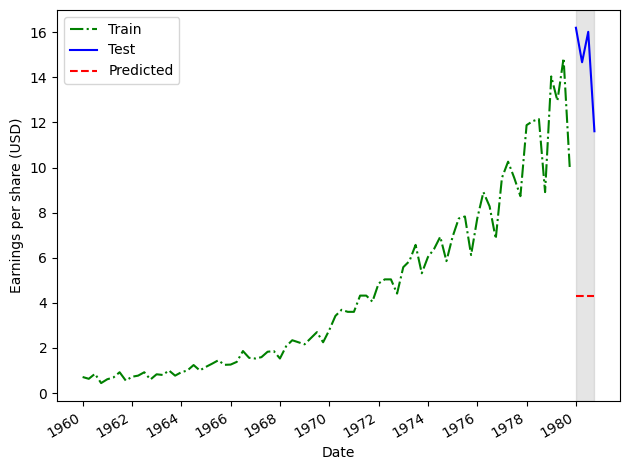

In [14]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

In [18]:
def plotts(y_axis):
    fig, ax = plt.subplots()
    ax.plot(train['date'], train['data'], 'g-.', label='Train')
    ax.plot(test['date'], test['data'], 'b-', label='Test')
    ax.plot(test['date'], test[y_axis], 'r--', label='Predicted')
    ax.set_xlabel('Date')
    ax.set_ylabel('Earnings per share (USD)')
    ax.axvspan(80, 83, color='#808080', alpha=0.2)
    ax.legend(loc=2)
    plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
    fig.autofmt_xdate()
    plt.tight_layout()

In [15]:
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

12.96


In [16]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

/tmp/ipykernel_82327/1649473344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


In [17]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
print(mape_last_year_mean)

15.5963680725103


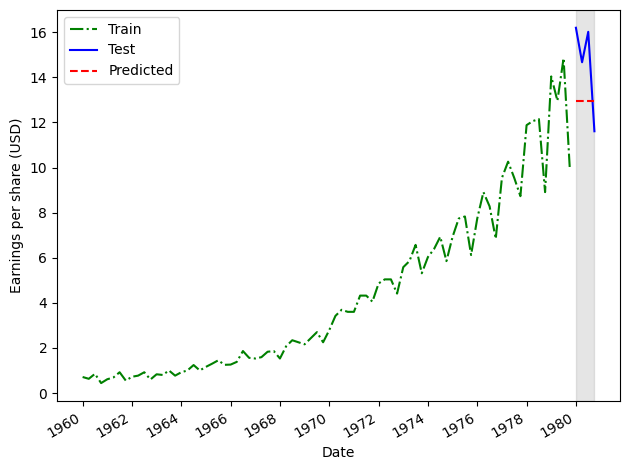

In [19]:
plotts('pred__last_yr_mean')

In [20]:
last = train.data.iloc[-1]
print(last)

9.99


In [21]:
test.loc[:, 'pred_last'] = last

/tmp/ipykernel_82327/155972364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


In [22]:
mape_last = mape(test['data'], test['pred_last'])
print(mape_last)

30.457277908606535


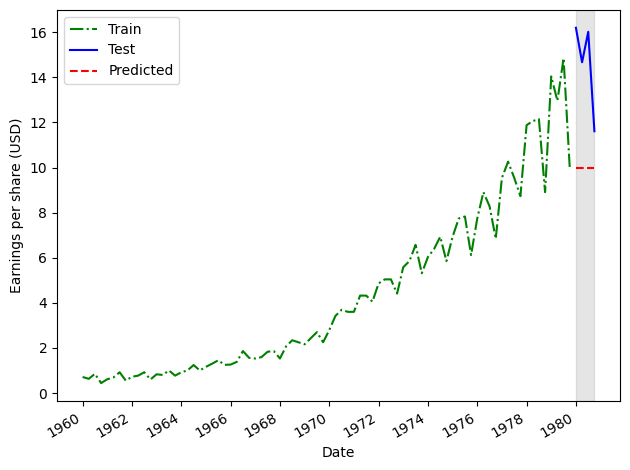

In [23]:
plotts('pred_last')

In [24]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

/tmp/ipykernel_82327/422051038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


In [25]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(mape_naive_seasonal)

11.561658552433654


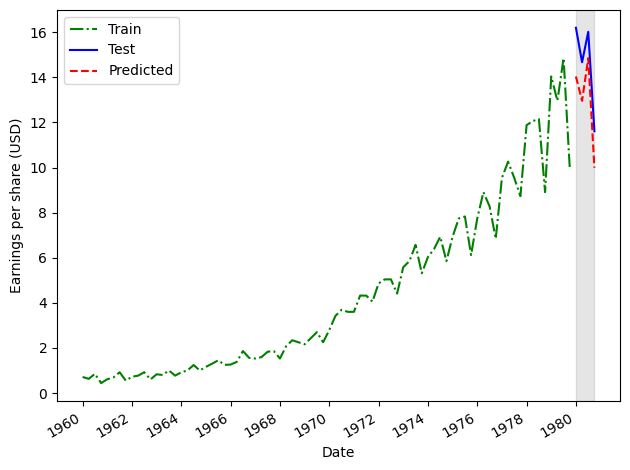

In [26]:
plotts('pred_last_season')